**Mount Google Drive**

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Required Libraries**

In [23]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


**Dataset Configuration (Matches Report)**

In [38]:
DATASET_PATH = '/content/drive/MyDrive/SIGN_LANGUAGE_DATA'
IMG_SIZE = 64
NUM_CLASSES = 6


**Data Loading & Preprocessing**

In [39]:
data = []
labels = []

for label in os.listdir(DATASET_PATH):
    folder = os.path.join(DATASET_PATH, label)
    if os.path.isdir(folder):
        for img_file in os.listdir(folder):
            img_path = os.path.join(folder, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0   # Normalization
            data.append(img)
            labels.append(label)

X = np.array(data)
y = np.array(labels)

print("Total Samples:", X.shape)


Total Samples: (1202, 64, 64, 3)


**Label Encoding & Train-Test Split**

In [40]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Update NUM_CLASSES based on the actual number of unique classes found by the encoder
NUM_CLASSES = len(encoder.classes_)
print(f"Updated NUM_CLASSES: {NUM_CLASSES}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print("Training:", X_train.shape)
print("Testing :", X_test.shape)

Updated NUM_CLASSES: 6
Training: (961, 64, 64, 3)
Testing : (241, 64, 64, 3)


**CNN Architecture**

In [41]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax') # Use the corrected NUM_CLASSES here
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

**CNN Training**

In [42]:
history = cnn_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.2176 - loss: 1.8968 - val_accuracy: 0.7732 - val_loss: 1.5157
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.6199 - loss: 1.3011 - val_accuracy: 0.9072 - val_loss: 0.4606
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8703 - loss: 0.4803 - val_accuracy: 0.9175 - val_loss: 0.1789
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9304 - loss: 0.2562 - val_accuracy: 0.9588 - val_loss: 0.1757
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9674 - loss: 0.1506 - val_accuracy: 0.9588 - val_loss: 0.1377


**CNN Evaluation**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
CNN Accuracy : 0.991701244813278
CNN Precision: 0.9920634920634921
CNN Recall   : 0.9927536231884058


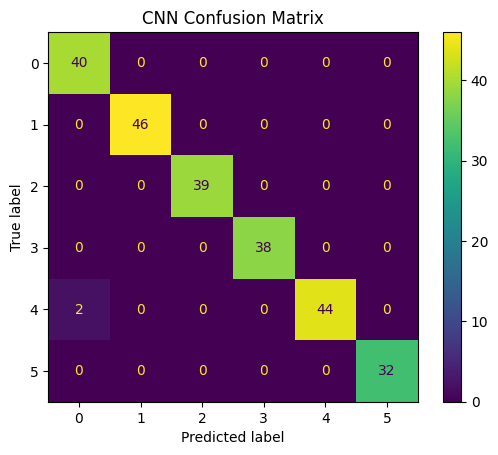

In [43]:
cnn_preds = np.argmax(cnn_model.predict(X_test), axis=1)

print("CNN Accuracy :", accuracy_score(y_test, cnn_preds))
print("CNN Precision:", precision_score(y_test, cnn_preds, average='macro'))
print("CNN Recall   :", recall_score(y_test, cnn_preds, average='macro'))

cm_cnn = confusion_matrix(y_test, cnn_preds)
ConfusionMatrixDisplay(cm_cnn).plot()
plt.title("CNN Confusion Matrix")
plt.show()

**Flatten Images**

In [44]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)


**SVM Training & Evaluation**

SVM Accuracy : 1.0
SVM Precision: 1.0
SVM Recall   : 1.0


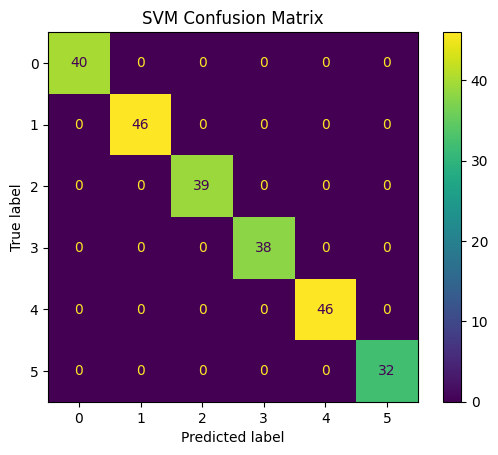

In [45]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_flat, y_train)

svm_preds = svm_model.predict(X_test_flat)

print("SVM Accuracy :", accuracy_score(y_test, svm_preds))
print("SVM Precision:", precision_score(y_test, svm_preds, average='macro'))
print("SVM Recall   :", recall_score(y_test, svm_preds, average='macro'))

cm_svm = confusion_matrix(y_test, svm_preds)
ConfusionMatrixDisplay(cm_svm).plot()
plt.title("SVM Confusion Matrix")
plt.show()

**k-NN Training & Evaluation**

k-NN Accuracy : 0.995850622406639
k-NN Precision: 0.9957264957264957
k-NN Recall   : 0.996376811594203


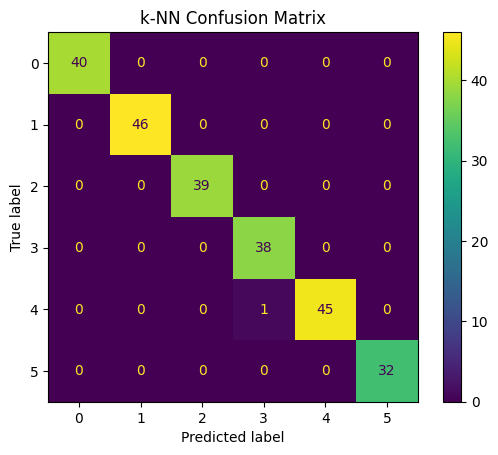

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_flat, y_train)

knn_preds = knn_model.predict(X_test_flat)

print("k-NN Accuracy :", accuracy_score(y_test, knn_preds))
print("k-NN Precision:", precision_score(y_test, knn_preds, average='macro'))
print("k-NN Recall   :", recall_score(y_test, knn_preds, average='macro'))

cm_knn = confusion_matrix(y_test, knn_preds)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("k-NN Confusion Matrix")
plt.show()

**Final Comparative Summary**

In [47]:
comparison = pd.DataFrame({
    "Model": ["CNN", "SVM", "k-NN"],
    "Accuracy (%)": [
        accuracy_score(y_test, cnn_preds) * 100,
        accuracy_score(y_test, svm_preds) * 100,
        accuracy_score(y_test, knn_preds) * 100
    ],
    "Precision": [
        precision_score(y_test, cnn_preds, average='macro', zero_division=0),
        precision_score(y_test, svm_preds, average='macro', zero_division=0),
        precision_score(y_test, knn_preds, average='macro', zero_division=0)
    ],
    "Recall": [
        recall_score(y_test, cnn_preds, average='macro', zero_division=0),
        recall_score(y_test, svm_preds, average='macro', zero_division=0),
        recall_score(y_test, knn_preds, average='macro', zero_division=0)
    ]
})

comparison

,Model,Accuracy (%),Precision,Recall
0,CNN,99.170124,0.992063,0.992754
1,SVM,100.000000,1.000000,1.000000
2,k-NN,99.585062,0.995726,0.996377
